In [1]:
import numpy as np
import pandas as pd
import  os
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\shams\newAnaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from sklearn import svm
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OrdinalEncoder 

In [3]:
data=pd.read_csv("..\dataset\collegePlace.csv")

In [4]:
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


c:\Users\shams\newAnaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

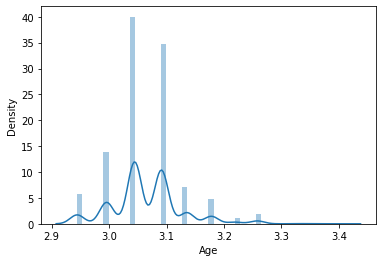

In [5]:
sns.distplot(np.log(data['Age']))

In [6]:
oe=OrdinalEncoder()
data[['Gender']]=oe.fit_transform(data[['Gender']])

In [7]:
data[['Stream']]=oe.fit_transform(data[['Stream']])

In [8]:
data

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,1.0,3.0,1,8,1,1,1
1,21,0.0,1.0,0,7,1,1,1
2,22,0.0,4.0,1,6,0,0,1
3,21,1.0,4.0,0,8,0,1,1
4,22,1.0,5.0,0,8,1,0,1
...,...,...,...,...,...,...,...,...
2961,23,1.0,4.0,0,7,0,0,0
2962,23,1.0,5.0,1,7,1,0,0
2963,22,1.0,4.0,1,7,0,0,0
2964,22,1.0,1.0,1,7,0,0,0


**univariate analysis**

c:\Users\shams\newAnaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

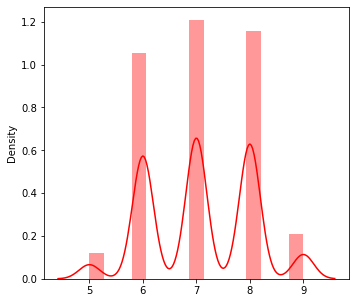

In [9]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(data[['CGPA']],color='r')

c:\Users\shams\newAnaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

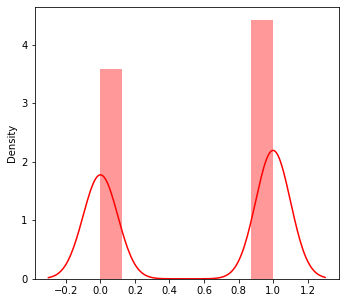

In [10]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(data[['PlacedOrNot']],color='r')

**bivariate analysis**

c:\Users\shams\newAnaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\shams\newAnaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


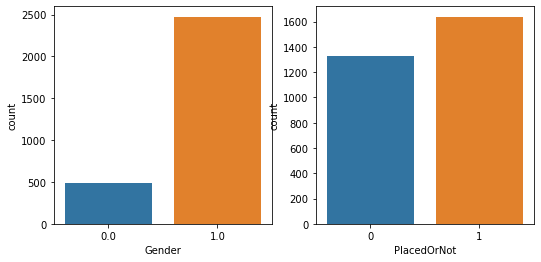

In [11]:
plt.figure(figsize=(18,4))
plt.subplot(1,4,1)
sns.countplot(data['Gender'])
plt.subplot(1,4,2)
sns.countplot(data['PlacedOrNot'])
plt.show()

**multivariate analysis**

c:\Users\shams\newAnaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PlacedOrNot', ylabel='count'>

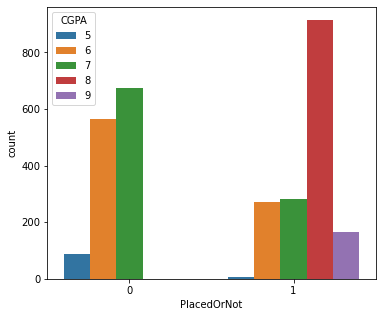

In [12]:
plt.figure(figsize=(20,5))
plt.subplot(131)
sns.countplot(data['PlacedOrNot'],hue=data['CGPA'])

c:\Users\shams\newAnaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\shams\newAnaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 94.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\shams\newAnaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 93.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='PlacedOrNot', ylabel='CGPA'>

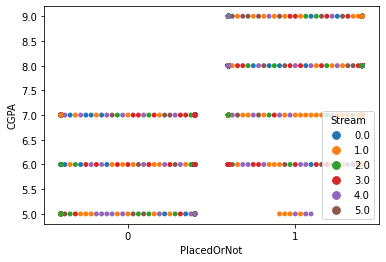

In [13]:
sns.swarmplot(data['PlacedOrNot'],data['CGPA'],hue=data['Stream'])

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2966 non-null   int64  
 1   Gender             2966 non-null   float64
 2   Stream             2966 non-null   float64
 3   Internships        2966 non-null   int64  
 4   CGPA               2966 non-null   int64  
 5   Hostel             2966 non-null   int64  
 6   HistoryOfBacklogs  2966 non-null   int64  
 7   PlacedOrNot        2966 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 185.5 KB


**scaling**

In [15]:
sc=StandardScaler()

In [16]:
data[['Age']]=sc.fit_transform(data[['Age']])

In [17]:
data

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,0.388131,1.0,3.0,1,8,1,1,1
1,-0.366752,0.0,1.0,0,7,1,1,1
2,0.388131,0.0,4.0,1,6,0,0,1
3,-0.366752,1.0,4.0,0,8,0,1,1
4,0.388131,1.0,5.0,0,8,1,0,1
...,...,...,...,...,...,...,...,...
2961,1.143013,1.0,4.0,0,7,0,0,0
2962,1.143013,1.0,5.0,1,7,1,0,0
2963,0.388131,1.0,4.0,1,7,0,0,0
2964,0.388131,1.0,1.0,1,7,0,0,0


**splitting the data for train and test**

In [18]:
X=data.drop(columns="PlacedOrNot")

In [19]:
X

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs
0,0.388131,1.0,3.0,1,8,1,1
1,-0.366752,0.0,1.0,0,7,1,1
2,0.388131,0.0,4.0,1,6,0,0
3,-0.366752,1.0,4.0,0,8,0,1
4,0.388131,1.0,5.0,0,8,1,0
...,...,...,...,...,...,...,...
2961,1.143013,1.0,4.0,0,7,0,0
2962,1.143013,1.0,5.0,1,7,1,0
2963,0.388131,1.0,4.0,1,7,0,0
2964,0.388131,1.0,1.0,1,7,0,0


In [20]:
Y=data.iloc[:,-1:]

In [21]:
Y

,PlacedOrNot
0,1
1,1
2,1
3,1
4,1
...,...
2961,0
2962,0
2963,0
2964,0


In [22]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8,random_state=16)

In [23]:
X_train

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs
1879,0.388131,1.0,4.0,0,8,0,1
1710,0.388131,1.0,5.0,1,5,0,0
1764,1.143013,1.0,0.0,0,6,0,1
187,-0.366752,1.0,1.0,1,6,0,0
1582,-0.366752,1.0,5.0,1,5,1,0
...,...,...,...,...,...,...,...
635,0.388131,1.0,2.0,2,8,0,0
1345,2.652777,1.0,1.0,1,7,0,0
581,-0.366752,1.0,0.0,1,8,0,0
2169,0.388131,1.0,4.0,1,5,1,0


In [24]:
Y_train

,PlacedOrNot
1879,1
1710,0
1764,0
187,0
1582,0
...,...
635,1
1345,1
581,1
2169,0


In [25]:
X_test

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs
2059,-0.366752,1.0,1.0,0,8,0,0
1004,0.388131,1.0,2.0,2,6,0,0
2173,-1.121634,0.0,1.0,0,9,1,1
994,-0.366752,1.0,4.0,1,6,1,1
890,0.388131,1.0,3.0,0,8,0,0
...,...,...,...,...,...,...,...
2003,-1.876516,1.0,1.0,0,8,0,0
1496,-0.366752,1.0,2.0,2,8,0,1
2065,-0.366752,1.0,4.0,2,7,0,1
1228,0.388131,1.0,5.0,0,9,1,1


In [26]:
Y_test

,PlacedOrNot
2059,1
1004,1
2173,1
994,1
890,1
...,...
2003,1
1496,1
2065,0
1228,1


**Model building**

**svm**

In [27]:
from sklearn.svm import SVC


In [28]:
classifier = SVC(kernel='linear')

In [29]:
classifier.fit(X_train,Y_train)

c:\Users\shams\newAnaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [30]:
X_train_prediction=classifier.predict(X_train)
X_test_prediction=classifier.predict(X_test)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)
testing_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [31]:
print('Accuracy score of the training data: ',training_data_accuracy)
print('Accuracy score of the testing data: ',testing_data_accuracy)


Accuracy score of the training data:  0.7765598650927488
Accuracy score of the testing data:  0.7474747474747475


**knn**

In [32]:
best_k={"Regular":0}
best_score={"Regular":0}
for k in range(3,50,2):
    knn_temp=KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train,Y_train)
    knn_temp_predict=knn_temp.predict(X_test)
    score=accuracy_score(Y_test,knn_temp_predict)*100
    if score>best_score["Regular"] and score<100:
        best_score["Regular"]=score
        best_k["Regular"]=k
print("k=",best_k)
print("accuracy=",best_score)

c:\Users\shams\newAnaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\shams\newAnaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\shams\newAnaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\shams\newAnaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of

k= {'Regular': 15}
accuracy= {'Regular': 87.54208754208754}


c:\Users\shams\newAnaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\shams\newAnaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\shams\newAnaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [33]:
knn=KNeighborsClassifier(n_neighbors=best_k["Regular"])
knn.fit(X_train, Y_train)
knn_pred=knn.predict(X_test)
testd=accuracy_score(knn_pred,Y_test)

c:\Users\shams\newAnaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


**ann**

In [34]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras import layers
from keras.layers import Dense
from keras.layers import Dropout
from keras.losses import BinaryCrossentropy

In [35]:
classifier=Sequential()
classifier.add(Dense(7,activation='relu',input_dim=7))
classifier.add(Dropout(0.50))
classifier.add(Dense(7,activation='relu'))
classifier.add(Dropout(0.50))
classifier.add(Dense(1,activation='sigmoid'))

In [36]:
loss1=BinaryCrossentropy()
classifier.compile(optimizer='Adam',loss=loss1,metrics=['accuracy'])

In [37]:
classifier.fit(X_train,Y_train,batch_size=20,epochs=100)

Epoch 1/100
119/119 [==============================] - 2s 3ms/step - loss: 0.8245 - accuracy: 0.5177
Epoch 2/100
119/119 [==============================] - 0s 3ms/step - loss: 0.7289 - accuracy: 0.5438
Epoch 3/100
119/119 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.5658
Epoch 4/100
119/119 [==============================] - 0s 2ms/step - loss: 0.6998 - accuracy: 0.5527
Epoch 5/100
119/119 [==============================] - 0s 2ms/step - loss: 0.6916 - accuracy: 0.5658
Epoch 6/100
119/119 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.5531
Epoch 7/100
119/119 [==============================] - 0s 2ms/step - loss: 0.6837 - accuracy: 0.5653
Epoch 8/100
119/119 [==============================] - 0s 2ms/step - loss: 0.6847 - accuracy: 0.5599
Epoch 9/100
119/119 [==============================] - 0s 2ms/step - loss: 0.6839 - accuracy: 0.5611
Epoch 10/100
119/119 [==============================] - 0s 2ms/step - loss: 0.6791 - accura

In [38]:
import pickle

**Save the best model**

In [39]:
pickle.dump(knn,open("placement.pkl",'wb'))
model=pickle.load(open('placement.pkl','rb'))